In [1]:
from src import data_setup, engine, utils, models
from importlib import reload

[reload(m) for m in (data_setup, engine, utils, models)]
device = engine.initialize()

[CONNECTED] NVIDIA GeForce RTX 3070


In [37]:
import torch
from torchvision.datasets import OxfordIIITPet as SET
from torchvision.transforms import ToTensor
from matplotlib import pyplot as plt
from pathlib import Path

data_dir = Path('data')
torch.set_default_device(device)
args_list = [{'root': data_dir, 'split': s, 'transform': ToTensor(), 'download': True} for s in ('trainval', 'test')]
data = [SET(**args) for args in args_list]
data

[Dataset OxfordIIITPet
     Number of datapoints: 3680
     Root location: data
     StandardTransform
 Transform: ToTensor(),
 Dataset OxfordIIITPet
     Number of datapoints: 3669
     Root location: data
     StandardTransform
 Transform: ToTensor()]

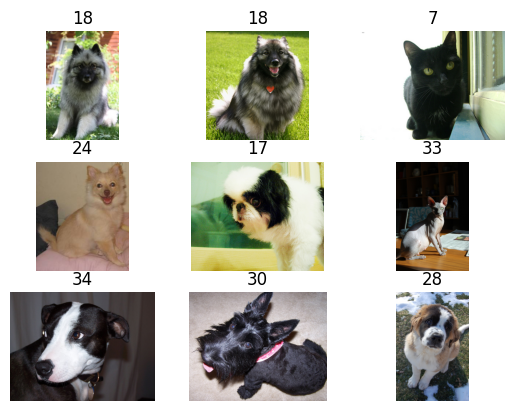

In [44]:
from torch.utils.data import DataLoader
loader = DataLoader(data[0], shuffle=True, generator=torch.Generator(device=device))
utils.visualize(loader, 9)